## https://colab.research.google.com/drive/18m-vmV2QPIoPGWSjl33zIpCIRyFHlrK-?usp=drive_link

In [1]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## 배경 이미지 위에 물체 이미지를 올리는 코드
## background_img : 배경 이미지
## object_img : 물체 이미지
## x_offset : 물체를 위치할 X 좌표 (x 좌측 끝 점)
## y_offset : 물체를 위치할 Y 좌표 (y 위쪽 끝 점)
def insert_img(background_img, object_img, x_offset, y_offset):

  x_end = x_offset + object_img.shape[1]  ## x 우측 끝 점
  y_end = y_offset + object_img.shape[0]  ## y 아래쪽 끝 점

  output_img = np.copy(background_img)    ## 출력 이미지

  for idxy, y in enumerate(range(y_offset,y_end)):
    for idxx, x in enumerate(range(x_offset,x_end)):
      if sum(object_img[idxy, idxx]) == 0:    ## 만약 물체 이미지 값이 검은색일 경우
        output_img[y,x] = background_img[y,x]   ## 배경 이미지 값 넣기
      else:
        output_img[y,x] = object_img[idxy, idxx]    ## 아닐 경우 물체 이미지 값 넣기

  return output_img

In [3]:
dirpath = "/content/drive/MyDrive/패턴인식/PR201910769/images/"

court1 = cv2.imread(dirpath+"court1.png")
court2 = cv2.imread(dirpath+"court2.png")

playerA_1 = cv2.imread(dirpath+"playerA_1.png")
playerA_2 = cv2.imread(dirpath+"playerA_2.png")
playerA_3 = cv2.imread(dirpath+"playerA_3.png")
playerA_4 = cv2.imread(dirpath+"playerA_4.png")
playerA_5 = cv2.imread(dirpath+"playerA_5.png")

playerB_1 = cv2.imread(dirpath+"playerB_1.png")
playerB_2 = cv2.imread(dirpath+"playerB_2.png")
playerB_3 = cv2.imread(dirpath+"playerB_3.png")
playerB_4 = cv2.imread(dirpath+"playerB_4.png")

ball_1 = cv2.imread(dirpath+'ball1.png')
ball_2 = cv2.imread(dirpath+'ball2.png')
ball_3 = cv2.imread(dirpath+'ball3.png')

referee = cv2.imread(dirpath+"referee.png")

## 90도 회전

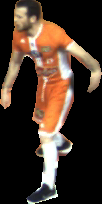

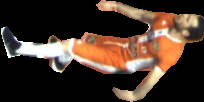

In [6]:
img = playerB_4
cv2_imshow(img)

height = img.shape[0]
width = img.shape[1]
center = (width / 2, height / 2)

d90 = 90.0 * np.pi / 180    # 90도

# 동차 행렬을 이용한 기하 변환

M1 = np.array([[np.cos(d90), -1* np.sin(d90), 0], ## 90도 회전, 저희는 이 부분에 음수를 사용해서 시계방향으로 90도 회전됩니다.
               [np.sin(d90), np.cos(d90), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, height], ## x축 height만큼 이동
               [0, 1, 0],     ## y축 이동 없음
               [0, 0, 1]], dtype=np.float32)
my_M = np.matmul( M2, M1) ## 회전(M1) 먼저 하고 이동 (M2)
my_M = my_M[0:2, :]  ## 함수에 입력으로 들어가도록 크기 맞추기
my_result_spin = cv2.warpAffine(img, my_M, (height, width))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(my_result_spin)

## 이미지 flip(좌우반전)

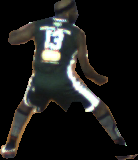

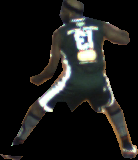

In [12]:
#Load image
img = playerA_1
cv2_imshow(img)
height, width = img.shape[0], img.shape[1]
#Flip
img_flip = np.zeros((height, width,3), dtype=np.uint8)

for x in range(height):
    for y in range(width):
        yp = width - y - 1        #좌우 반전
        img_flip[x, y] = img[x, yp] #좌우 반전

cv2_imshow(img_flip)

## 이미지 resize

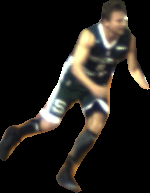

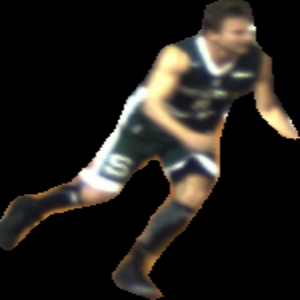

In [18]:
img = playerA_4
cv2_imshow(img)

my_result_resize = cv2.resize(img, dsize=(300, 300), interpolation=cv2.INTER_LINEAR)   # INTER_LINEAR 보간법 사용
cv2_imshow(my_result_resize)

In [24]:
testinsert = insert_img(court1, my_result_spin, 1000, 800)
testinsert = insert_img(testinsert, img_flip, 1000, 500)
testinsert = insert_img(testinsert, my_result_resize, 400, 300)
cv2_imshow(testinsert)

Output hidden; open in https://colab.research.google.com to view.